## **[9 Techniques for Cross-validating Time Series Data](https://vcerq.medium.com/9-techniques-for-cross-validating-time-series-data-7828fc3f781d)**
### **Exploring the pros and cons of different cross-validation approaches for time series**

### **Introduction**

Evaluating performance is essential for forecasting model development. Out-of-sample data, or data not used for training, should be used for evaluation. Cross-validation is a popular technique to do this.

When working with time series, you should make sure that cross-validation addresses the time-dependent nature of the data. In a previous article, I listed four aspects of this issue.

Here, we’ll explore 9 cross-validation methods used for time series. These include out-of-sample validation (holdout) or several extensions of the popular K-fold cross-validation.

TimeSeriesSplits is often the go-to approach to evaluate forecasting performance. This method is also known as Time Series Cross-validation. Yet, other approaches listed here may provide you with valuable insights for solving this task.

Let’s dive in.

#### **1. Holdout**

Holdout is the simplest approach for estimating forecasting performance. It works by making a single split (Figure 1). The first part of the series is used for training a model. This model is tested in the remaining observations.

The training set size is usually set to 70% of the total number of observations.

You can apply Holdout with the function train_test_split from scikit-learn.

<center> <p>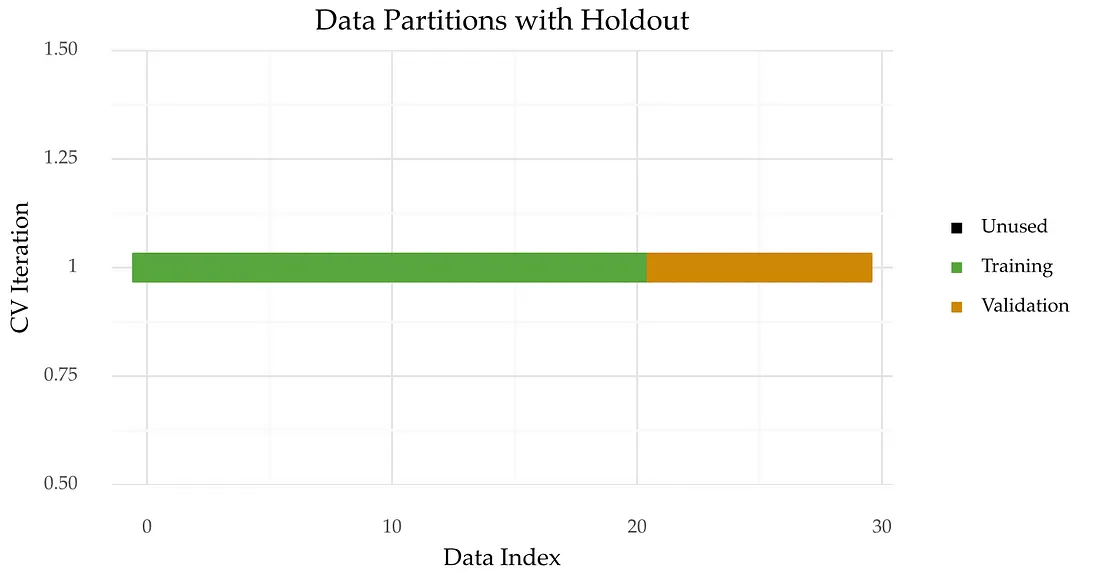</p> </center>

Carrying a single split may lead to unreliable estimates if the time series size is not large.

#### **2. Time Series Cross-Validation**
It is a good idea to carry out many splits. By doing so, you test the model on different parts of the data.

One way to do this is by using Time Series Cross-validation. Here is a visual description of this technique:

<center> <p>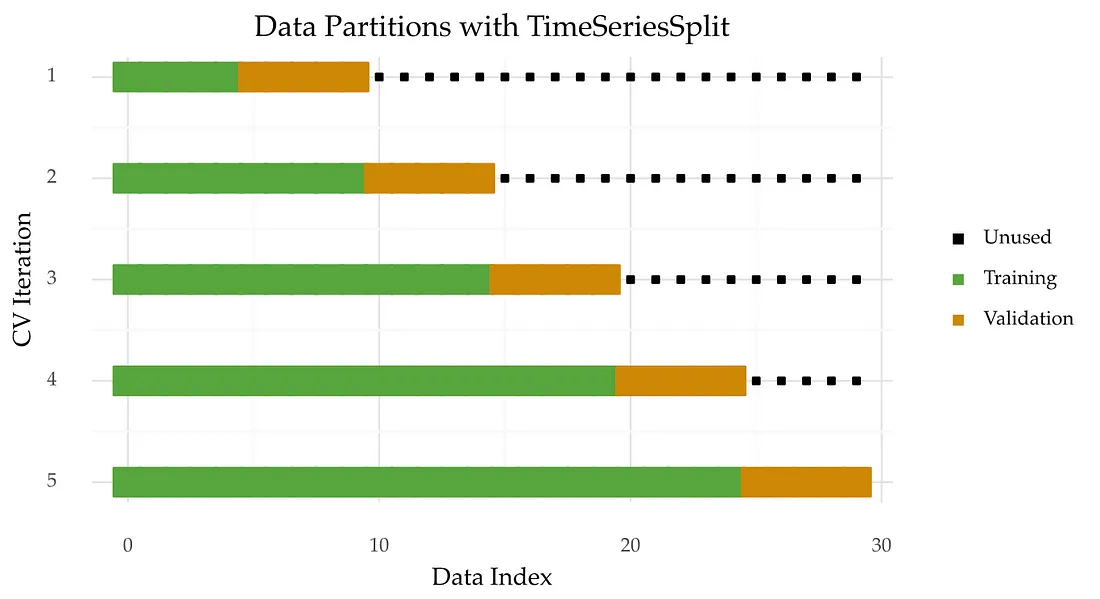</p> </center>

The time series is split into K contiguous blocks of data. Each block is first used to test the model and then to re-train it. Except for the first block, which is only used for training.

Time Series Cross-Validation is implemented in scikit-learn as [TimeSeriesSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html).

#### **3. Time Series Cross-Validation with a Gap**
The above technique can be applied with a gap between training and validation (Figure 3). This can help increase the independence between the two samples.

You can introduce this gap using the gap parameter in the TimeSeriesSplit class.

<center> <p>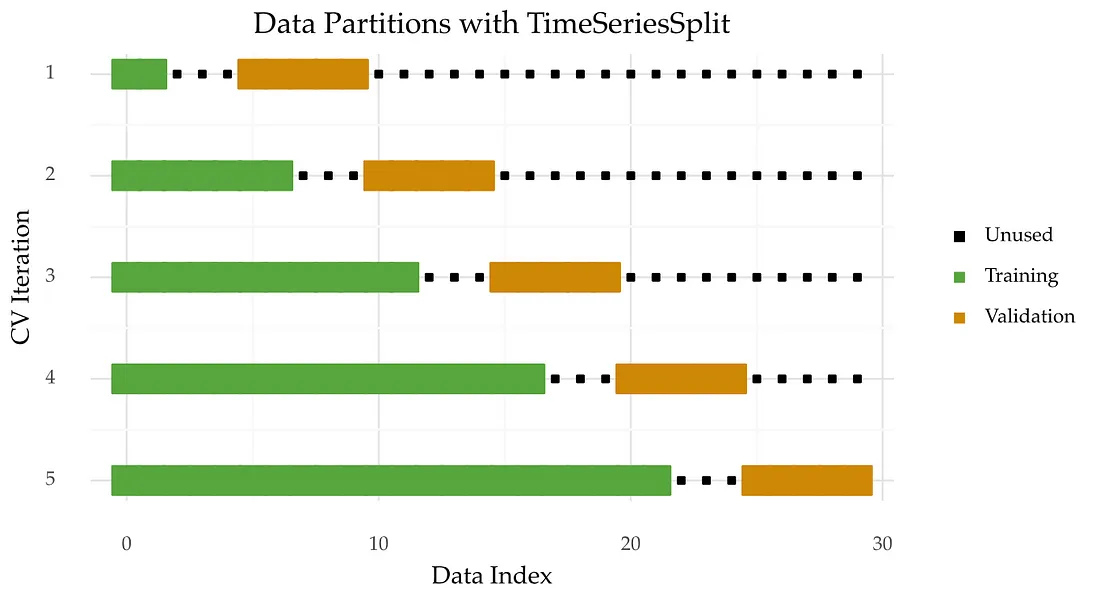</p> </center>

#### **4. Sliding Time Series Cross-Validation**
Another way to apply Time Series Cross-Validation is with a sliding window (Figure 4). After iteration, the oldest block of data is discarded.

This approach might be useful in two cases:

1. The data size is huge;
2. Older observations are obsolete.

<center> <p>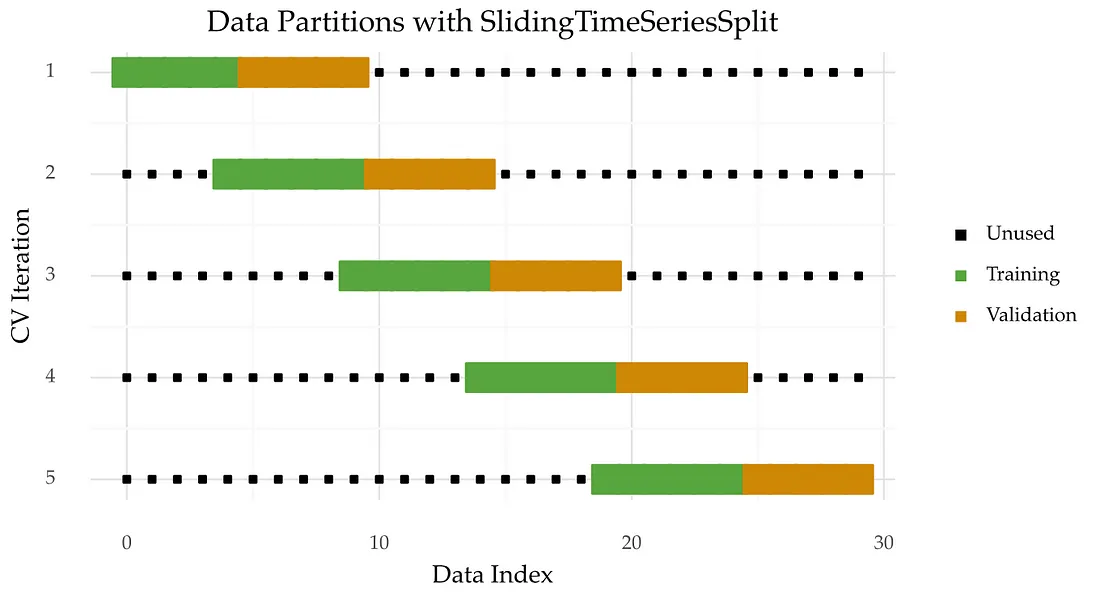</p> </center>

This variant can also be applied with a gap between the training and validation samples.

#### **5. Monte Carlo Cross-Validation**
Monte Carlo cross-validation is an alternative approach to TimeSeriesSplit.

Here’s a visual intuition of this technique.

<center> <p>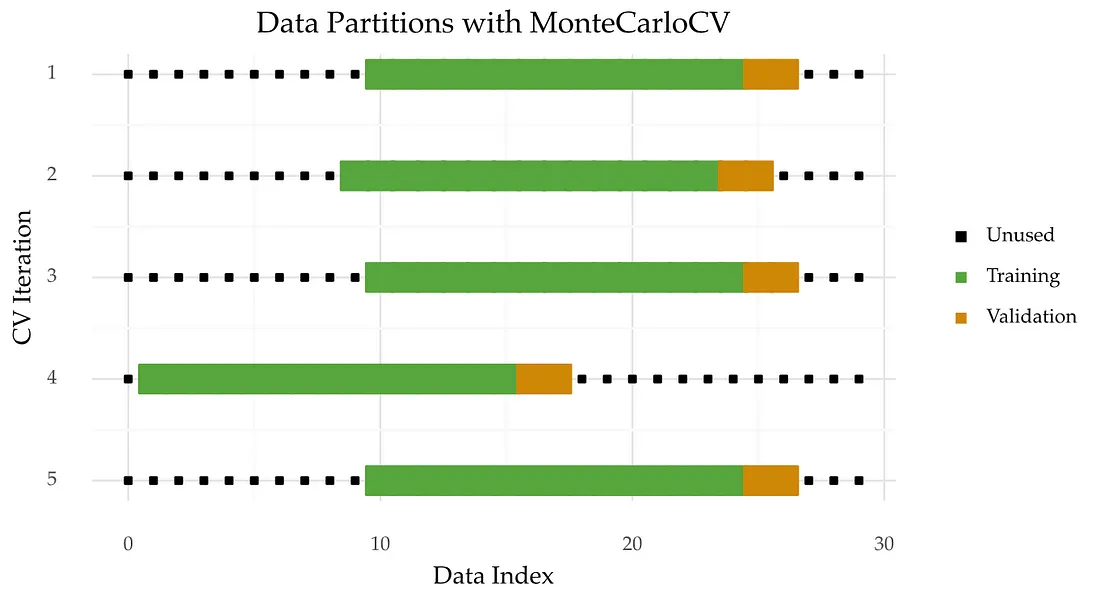</p> </center>

The validation origin in each iteration is selected at random, unlike in TimeSeriesSplits.

#### **6. K-Fold Cross-Validation**

<center> <p>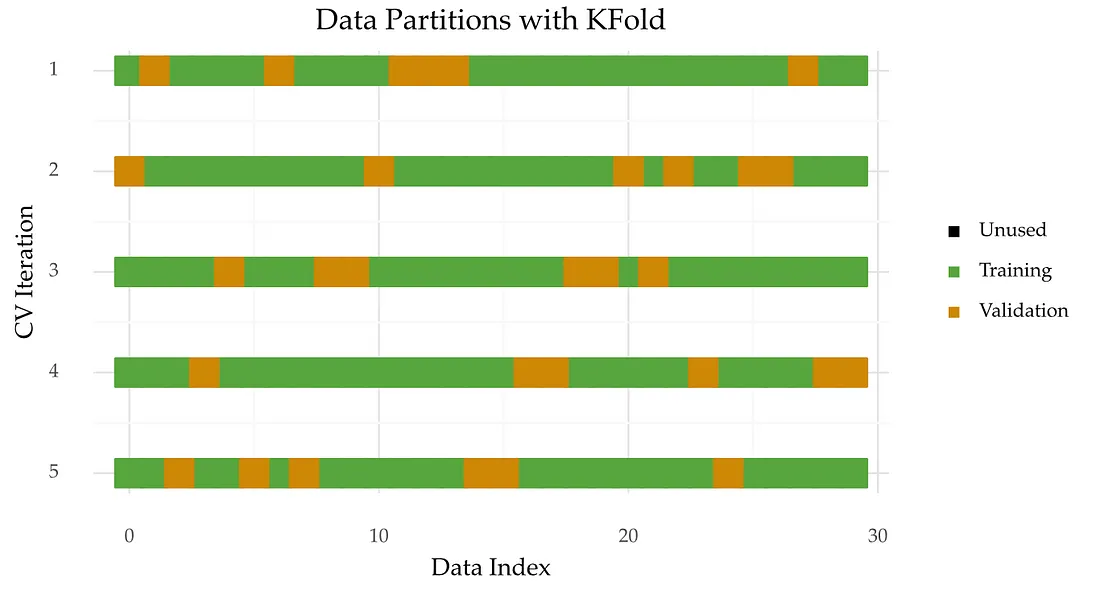</p> </center>

K-fold cross-validation (Figure 6) is a popular technique for evaluating the performance of models. It works by shuffling the observations and assigning them to K folds of equal size. Then, each fold is used as validation.

The main advantage of this approach is that all observations are used for validation at some point.

But, the whole process works under the assumption that observations are independent. This is not true for time series. Because of this, it’s preferable to pick a cross-validation approach that respects the temporal order of observations.

Yet, there are some cases where K-fold cross-validation can be useful for time series. For example, when the time series is stationary or the sample size is small. You can read more about this in reference [1].

#### **7. Blocked K-Fold Cross-Validation**
Some techniques have been specially designed to extend K-Fold cross-validation for time series.

One of these approaches is the Blocked K-Fold Cross-Validation. The process is similar to before but without the shuffling part. The order of observations is kept within each block but broken across them.

This method can be handy for stationary time series. You can check more details in references [2] and [3].

<center> <p>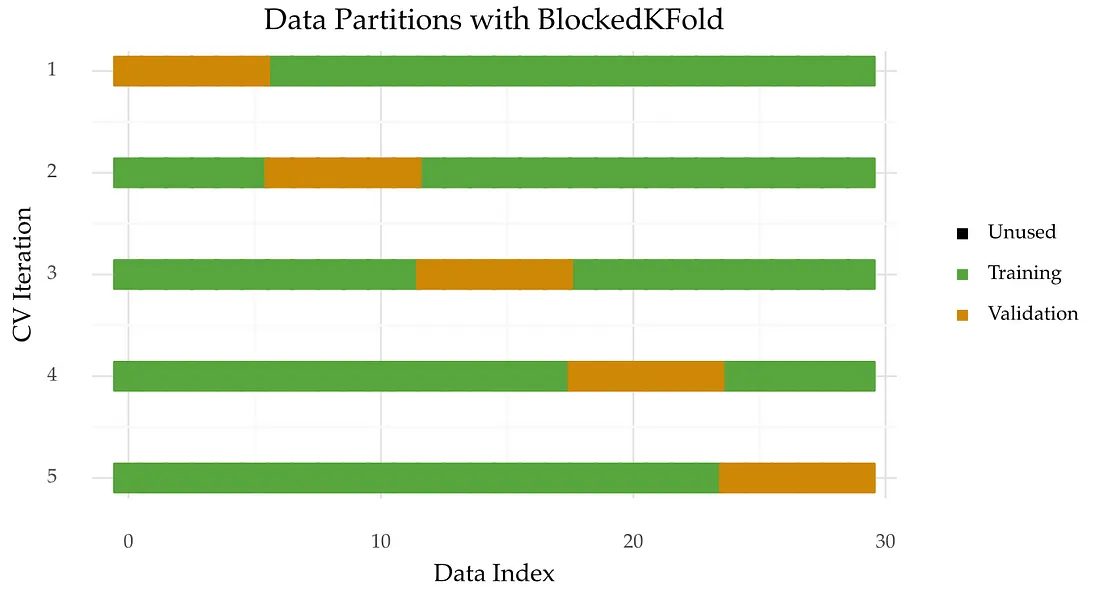</p> </center>

#### **8. hv-Blocked K-Fold Cross-Validation**

<center> <p>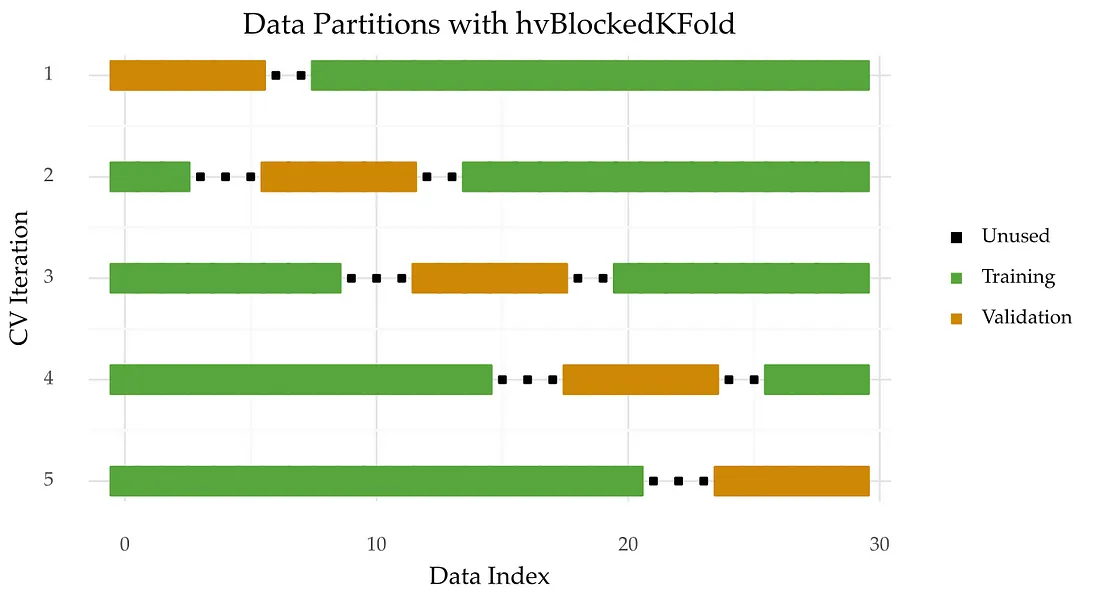</p> </center>

You can try to increase the independence between training and validation by introducing a gap between the two samples. This leads to the approach called hv-Blocked K-Fold Cross-Validation.

#### **9. Modified K-Fold Cross-Validation**
The Modified K-Fold Cross-Validation keeps the shuffling part of the process (Figure 9). But, it removes any training observations that are close to validation samples.

The Modified K-Fold Cross-Validation relies on creating gaps rather than blocking. The main problem with this technique is that many training observations are removed. This can result in under-fitting issues.

<center> <p>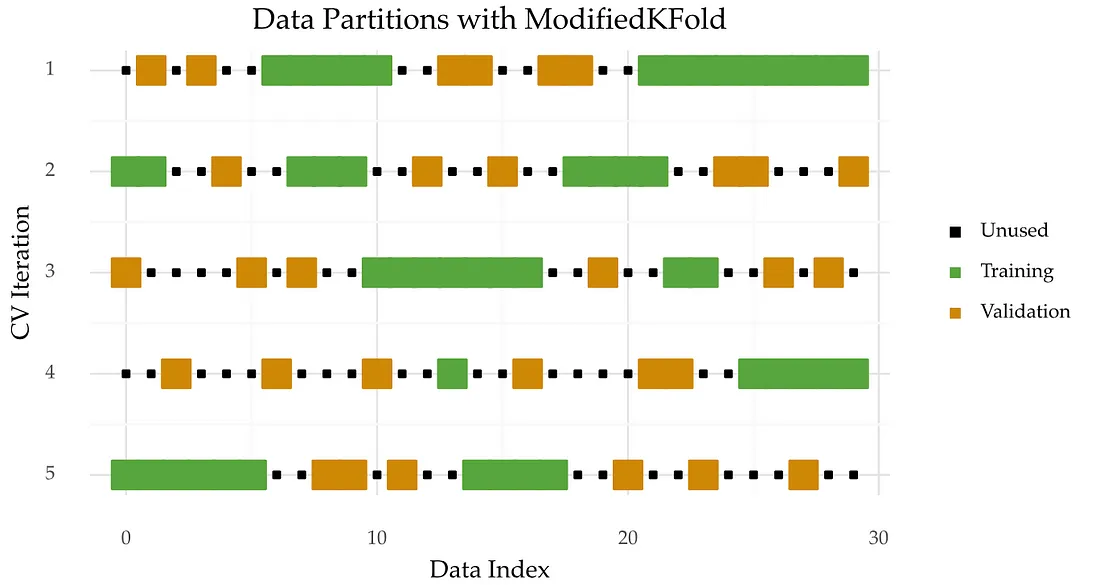</p> </center>

### **Closing Thoughts**

We’ve outlined 9 different cross-validation procedures that can be used for time series.

My preferred technique is Monte Carlo cross-validation (number 5 on the list). Time series cross-validation (and its variants) are a good alternative. I often settle for Holdout if the time series size is large because the evaluation process is quicker.

Despite this, you may find the other techniques useful in your particular case.

All graphics above were created using plotnine. The code is available in my github.

Thanks for reading, and see you in the next story!

#### **References**
[1] Bergmeir, Christoph, Rob J. Hyndman, and Bonsoo Koo. “A note on the validity of cross-validation for evaluating autoregressive time series prediction.” Computational Statistics & Data Analysis 120 (2018): 70–83.

[2] Bergmeir, C., & Benítez, J. M. (2012). On the use of cross-validation for time series predictor evaluation. Information Sciences, 191, 192–213.

[3] Cerqueira, Vitor, Luis Torgo, and Igor Mozetič. “Evaluating time series forecasting models: An empirical study on performance estimation methods.” Machine Learning 109.11 (2020): 1997–2028.

[4] Racine, J. (2000). Consistent cross-validatory model-selection for dependent data: hv-block cross-validation.
Journal of Econometrics, 99(1), 39–61.

[5] Arlot, Sylvain, and Alain Celisse. “A survey of cross-validation procedures for model selection.” Statistics surveys 4 (2010): 40–79.